# Mount drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Install dependencies

In [ ]:
!pip install lambeq[extras]

  Using cached lambeq-0.3.3-py3-none-any.whl (152 kB)
  Using cached discopy-1.1.5-py3-none-any.whl (148 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.3/364.3 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 65.0 MB/s eta 0:00:00
  

# Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

# QNLP
from lambeq.tokeniser import SpacyTokeniser
from lambeq import BobcatParser, spiders_reader, cups_reader, TreeReader, TreeReaderMode, stairs_reader
from lambeq import Rewriter, SimpleRewriteRule, remove_cups, AtomicType, IQPAnsatz
from discopy.tensor import Dim
from discopy.grammar.pregroup import Cap, Id, Diagram

# Training
from lambeq import NumpyModel, QuantumTrainer, SPSAOptimizer, Dataset, BinaryCrossEntropyLoss, PennyLaneModel, PytorchTrainer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

# SEED for reproducibility
import random
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Load data

In [ ]:
QUANTUM_PATH = '/content/drive/MyDrive/Tesi/Master-Thesis/data/processed/quantum.csv'
CLASSICAL_PATH = '/content/drive/MyDrive/Tesi/Master-Thesis/data/processed/classical.csv'

df = pd.read_csv(CLASSICAL_PATH, index_col=False)

# SE_DS_PATH = '/content/drive/MyDrive/Tesi/Master-Thesis/data/processed/binary_classification/SE/quantum.csv'
# US_DS_PATH = '/content/drive/MyDrive/Tesi/Master-Thesis/data/processed/binary_classification/US/quantum.csv'
# O_DS_PATH = '/content/drive/MyDrive/Tesi/Master-Thesis/data/processed/binary_classification/O/quantum.csv'
# PE_DS_PATH = '/content/drive/MyDrive/Tesi/Master-Thesis/data/processed/binary_classification/PE/quantum.csv'

# SE_CLASSICAL_DS_PATH = '/content/drive/MyDrive/Tesi/Master-Thesis/data/processed/binary_classification/SE/classical.csv'
# US_CLASSICAL_DS_PATH = '/content/drive/MyDrive/Tesi/Master-Thesis/data/processed/binary_classification/US/classical.csv'
# O_CLASSICAL_DS_PATH = '/content/drive/MyDrive/Tesi/Master-Thesis/data/processed/binary_classification/O/classical.csv'
# PE_CLASSICAL_DS_PATH = '/content/drive/MyDrive/Tesi/Master-Thesis/data/processed/binary_classification/PE/classical.csv'

# QUANTUM_UNBALANCED_PATH = '/content/drive/MyDrive/Tesi/Master-Thesis/data/processed/quantum_unb.csv'
# CLASSICAL_UNBALANCED_PATH = '/content/drive/MyDrive/Tesi/Master-Thesis/data/processed/classical_unb.csv'

# DS = 'C'

# if DS == 'Q':
#     se_df = pd.read_csv(SE_DS_PATH, index_col=False)
#     us_df = pd.read_csv(US_DS_PATH, index_col=False)
#     o_df = pd.read_csv(O_DS_PATH, index_col=False)
#     pe_df = pd.read_csv(PE_DS_PATH, index_col=False)
# elif DS == 'C':
#     se_df = pd.read_csv(SE_CLASSICAL_DS_PATH, index_col=False)
#     us_df = pd.read_csv(US_CLASSICAL_DS_PATH, index_col=False)
#     o_df = pd.read_csv(O_CLASSICAL_DS_PATH, index_col=False)
#     pe_df = pd.read_csv(PE_CLASSICAL_DS_PATH, index_col=False)
# elif DS == 'U':
#     se_df = pd.read_csv(QUANTUM_UNBALANCED_PATH, index_col=False)
#     us_df = pd.read_csv(QUANTUM_UNBALANCED_PATH, index_col=False)
#     o_df = pd.read_csv(QUANTUM_UNBALANCED_PATH, index_col=False)
#     pe_df = pd.read_csv(QUANTUM_UNBALANCED_PATH, index_col=False)

# Create string-diagrams
Uncomment rows for different readers

In [ ]:
def create_binary_diagrams(df, reader):
    diagrams = []
    se_targets, us_targets, o_targets, pe_targets = [], [], [], []
    for _, row in enumerate(df.to_numpy()):
        sentence, target = row[0], row[1]
        try:
            diagrams.append(reader.sentence2diagram(sentence))
        except Exception as e:
            print(sentence)
            print(e)
            continue
        if target == "SE":
            se_targets.append([1.0, 0.0])
            us_targets.append([0.0, 1.0])
            o_targets.append([0.0, 1.0])
            pe_targets.append([0.0, 1.0])
        elif target == "US":
            se_targets.append([0.0, 1.0])
            us_targets.append([1.0, 0.0])
            o_targets.append([0.0, 1.0])
            pe_targets.append([0.0, 1.0])
        elif target == "O":
            se_targets.append([0.0, 1.0])
            us_targets.append([0.0, 1.0])
            o_targets.append([1.0, 0.0])
            pe_targets.append([0.0, 1.0])
        elif target == "PE":
            se_targets.append([0.0, 1.0])
            us_targets.append([0.0, 1.0])
            o_targets.append([0.0, 1.0])
            pe_targets.append([1.0, 0.0])
    return diagrams, se_targets, us_targets, o_targets, pe_targets

reader = spiders_reader
# reader = cups_reader
# reader = stairs_reader
# reader = TreeReader(ccg_parser=BobcatParser, mode = TreeReaderMode.RULE_TYPE)

# reader = BobcatParser(root_cats=['S'])

diagrams, se_targets, us_targets, o_targets, pe_targets = create_binary_diagrams(df, reader)

# Rewrite string-diagrams
This step is not performed for linear readers (spiders, cups, etc.).

In [ ]:
# def normalize_diagrams(diagrams):
#     normalized_diagrams = []
#     for i, diagram in enumerate(diagrams):
#         try:
#             normalized_diagrams.append(rewriter(diagram).normal_form())
#         except Exception as e:
#             print(e)
#             diagram.draw()
#             continue
#     return normalized_diagrams

# rewriter = Rewriter(['prepositional_phrase', 'determiner', 'connector', 'auxiliary', 'preadverb', 'curry', 'coordination'])
# diagrams = normalize_diagrams(diagrams)

# Parameterize diagrams
Uncomment rows for different anstaze

In [ ]:
def create_circuits(diagrams, ansatz):
    circuits = []
    for i, diagram in enumerate(diagrams):
        try:
            circuits.append(ansatz(remove_cups(diagram)))
        except Exception as e:
            print(e)
            diagram.draw(figsize=(8,5), fontsize=8)
            continue
    return circuits

ob_map = {
    AtomicType.SENTENCE: 1,
    AtomicType.NOUN: 1,
    AtomicType.PREPOSITIONAL_PHRASE: 1,
}

ansatz = IQPAnsatz(ob_map, n_layers=1, n_single_qubit_params=3)
circuits = create_circuits(diagrams, ansatz)

# # check for codomain errors
# for i,c in enumerate(se_circuits):
#     if str(c.cod) != 'qubit':
#         print(se_df.loc[[i]])
#         se_normalized_diagrams[i].draw()

# Define evalutation metrics

In [ ]:
def accuracy(y_hat, y):
    y_true = torch.argmax(y, dim=1)
    y_pred = torch.argmax(y_hat, dim=1)
    return accuracy_score(y_true, y_pred)

def precision(y_hat, y):
    y_true = torch.argmax(y, dim=1)
    y_pred = torch.argmax(y_hat, dim=1)
    return precision_score(y_true, y_pred, zero_division=1)

def recall(y_hat, y):
    y_true = torch.argmax(y, dim=1)
    y_pred = torch.argmax(y_hat, dim=1)
    return recall_score(y_true, y_pred, zero_division=1)

def f1score(y_hat, y):
    y_true = torch.argmax(y, dim=1)
    y_pred = torch.argmax(y_hat, dim=1)
    return f1_score(y_true, y_pred, zero_division=1)

eval_metrics = {"prec": precision, "rec": recall, "acc": accuracy, "f1": f1score}

# Define model

In [ ]:
class QuantumModel(PennyLaneModel):
    def __init__(self, **kwargs):
        PennyLaneModel.__init__(self, **kwargs)

    def forward(self, input):
        preds = self.get_diagram_output(input)
        return preds

# Training

In [ ]:
EPOCHS = 50
SPLIT = 10
EARLY_STOPPING = None

custom_primary = '#007FFF'
custom_secondary = '#FF6666'

## Grid Search

In [ ]:
for bs in [32, 64]:
    for lr in [7e-3, 1e-2, 3e-2, 5e-2]:
        X_train_grid, X_val_grid, y_train_grid, y_val_grid = train_test_split(circuits, se_targets, test_size=1/SPLIT, random_state=SEED)
        train_dataset = Dataset(X_train_grid, y_train_grid, batch_size=bs)
        val_dataset =  Dataset(X_val_grid, y_val_grid, shuffle=False)

        model = QuantumModel.from_diagrams(circuits)
        model.initialise_weights()

        trainer = PytorchTrainer(
                        model=model,
                        loss_function=torch.nn.BCEWithLogitsLoss(),
                        optimizer=torch.optim.AdamW,
                        learning_rate=lr,
                        epochs=EPOCHS,
                        evaluate_functions=eval_metrics,
                        evaluate_on_train=True,
                        verbose='text',
                        seed=SEED
                    )

        trainer.fit(train_dataset, val_dataset, log_interval=25)

        range_ = np.arange(1, len(trainer.train_epoch_costs) + 1)

        fig, axes = plt.subplot_mosaic('AA;BC;DE', figsize=(8, 10))

        axes['A'].plot(range_, trainer.train_epoch_costs, color=custom_primary, label='Training Loss')
        axes['A'].plot(range_, trainer.val_costs, color=custom_secondary, label='Validation Loss')
        axes['A'].set_title('Loss')

        axes['B'].plot(range_, trainer.train_eval_results['prec'], color=custom_primary, label='Training Precision')
        axes['B'].plot(range_, trainer.val_eval_results['prec'], color=custom_secondary, label='Validation Precision')
        axes['B'].set_title('Precision')

        axes['C'].plot(range_, trainer.train_eval_results['rec'], color=custom_primary, label='Training Recall')
        axes['C'].plot(range_, trainer.val_eval_results['rec'], color=custom_secondary, label='Validation Recall')
        axes['C'].set_title('Recall')

        axes['D'].plot(range_, trainer.train_eval_results['acc'], color=custom_primary, label='Training Accuracy')
        axes['D'].plot(range_, trainer.val_eval_results['acc'], color=custom_secondary, label='Validation Accuracy')
        axes['D'].set_title('Accuracy')

        axes['E'].plot(range_, trainer.train_eval_results['f1'], color=custom_primary, label='Training F1-Score')
        axes['E'].plot(range_, trainer.val_eval_results['f1'], color=custom_secondary, label='Validation F1-Score')
        axes['E'].set_title('F1-Score')

        for _, ax in axes.items():
            ax.legend().set_visible(False)

        fig.legend(['Training', 'Validation'], loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=2)
        plt.figtext(0.99, -0.07, f'batch_size={bs}, learning_rate={lr}', horizontalalignment='right', fontsize=9, color='black')

        plt.tight_layout()
        plt.savefig(f"/content/drive/MyDrive/Tesi/Master-Thesis/figures/grid-search/quantum/binary/{bs}-{lr}.pdf", format="pdf", bbox_inches="tight")
        plt.show()

## K-fold cross validation
After grid-search we choose:

In [ ]:
LEARNING_RATE = 2e-2
BATCH_SIZE = 64

Processing Fold 1 ...


Epoch 25:  train/loss: 0.5040   valid/loss: 0.5507   train/acc: 0.9969   train/f1: 0.9978   valid/acc: 0.9167   valid/f1: 0.9388
Epoch 50:  train/loss: 0.5033   valid/loss: 0.5777   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.8333   valid/f1: 0.8750

Training completed!


Processing Fold 2 ...


Epoch 25:  train/loss: 0.5113   valid/loss: 0.5573   train/acc: 0.9969   train/f1: 0.9976   valid/acc: 0.8889   valid/f1: 0.9091
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5286   train/acc: 0.9969   train/f1: 0.9975   valid/acc: 0.9444   valid/f1: 0.9565

Training completed!


Processing Fold 3 ...


Epoch 25:  train/loss: 0.5032   valid/loss: 0.5429   train/acc: 0.9969   train/f1: 0.9975   valid/acc: 0.9444   valid/f1: 0.9583
Epoch 50:  train/loss: 0.5114   valid/loss: 0.5534   train/acc: 0.9969   train/f1: 0.9976   valid/acc: 0.8889   valid/f1: 0.9091

Training completed!


Processing Fold 4 ...


Epoch 25:  train/loss: 0.5039   valid/loss: 0.5450   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9167   valid/f1: 0.9333
Epoch 50:  train/loss: 0.5075   valid/loss: 0.5374   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9444   valid/f1: 0.9565

Training completed!


Processing Fold 5 ...


Epoch 25:  train/loss: 0.5033   valid/loss: 0.5330   train/acc: 0.9969   train/f1: 0.9978   valid/acc: 0.9429   valid/f1: 0.9565
Epoch 50:  train/loss: 0.5043   valid/loss: 0.5447   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9143   valid/f1: 0.9333

Training completed!


Processing Fold 6 ...


Epoch 25:  train/loss: 0.5135   valid/loss: 0.5379   train/acc: 0.9969   train/f1: 0.9975   valid/acc: 0.9143   valid/f1: 0.9302
Epoch 50:  train/loss: 0.5037   valid/loss: 0.5419   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9143   valid/f1: 0.9302

Training completed!


Processing Fold 7 ...


Epoch 25:  train/loss: 0.5034   valid/loss: 0.5346   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9429   valid/f1: 0.9545
Epoch 50:  train/loss: 0.5036   valid/loss: 0.5455   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9143   valid/f1: 0.9333

Training completed!


Processing Fold 8 ...


Epoch 25:  train/loss: 0.5036   valid/loss: 0.5496   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9143   valid/f1: 0.9302
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5494   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9143   valid/f1: 0.9302

Training completed!


Processing Fold 9 ...


Epoch 25:  train/loss: 0.5035   valid/loss: 0.5798   train/acc: 0.9969   train/f1: 0.9977   valid/acc: 0.8571   valid/f1: 0.8936
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5692   train/acc: 0.9969   train/f1: 0.9972   valid/acc: 0.8571   valid/f1: 0.8936

Training completed!


Processing Fold 10 ...


Epoch 25:  train/loss: 0.5033   valid/loss: 0.5697   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.8571   valid/f1: 0.8936
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5712   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.8571   valid/f1: 0.8936

Training completed!


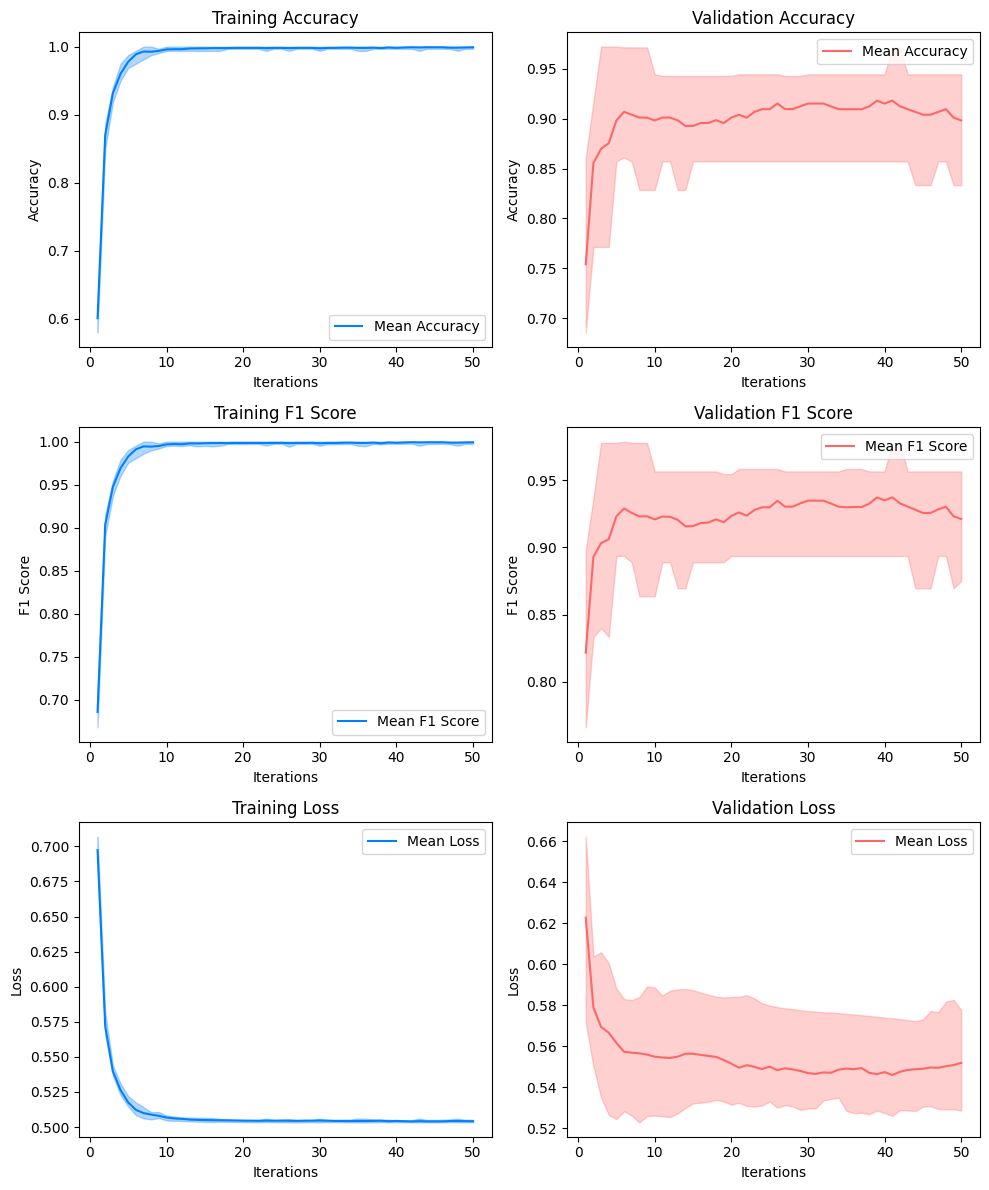

Processing Fold 1 ...


Epoch 25:  train/loss: 0.5041   valid/loss: 0.5468   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9167   valid/f1: 0.9434
Epoch 50:  train/loss: 0.5033   valid/loss: 0.5063   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 1.0000   valid/f1: 1.0000

Training completed!


Processing Fold 2 ...


Epoch 25:  train/loss: 0.5045   valid/loss: 0.5140   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 1.0000   valid/f1: 1.0000
Epoch 50:  train/loss: 0.5045   valid/loss: 0.5159   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9722   valid/f1: 0.9811

Training completed!


Processing Fold 3 ...


Epoch 25:  train/loss: 0.5116   valid/loss: 0.5748   train/acc: 0.9937   train/f1: 0.9961   valid/acc: 0.8611   valid/f1: 0.9091
Epoch 50:  train/loss: 0.5033   valid/loss: 0.5714   train/acc: 0.9937   train/f1: 0.9958   valid/acc: 0.8611   valid/f1: 0.9091

Training completed!


Processing Fold 4 ...


Epoch 25:  train/loss: 0.5113   valid/loss: 0.5496   train/acc: 0.9906   train/f1: 0.9938   valid/acc: 0.9167   valid/f1: 0.9474
Epoch 50:  train/loss: 0.5113   valid/loss: 0.5787   train/acc: 0.9937   train/f1: 0.9957   valid/acc: 0.8611   valid/f1: 0.9091

Training completed!


Processing Fold 5 ...


Epoch 25:  train/loss: 0.5035   valid/loss: 0.5462   train/acc: 0.9969   train/f1: 0.9978   valid/acc: 0.8857   valid/f1: 0.9259
Epoch 50:  train/loss: 0.5034   valid/loss: 0.5428   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9143   valid/f1: 0.9455

Training completed!


Processing Fold 6 ...


Epoch 25:  train/loss: 0.5044   valid/loss: 0.5622   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.8857   valid/f1: 0.9200
Epoch 50:  train/loss: 0.5033   valid/loss: 0.5623   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.8857   valid/f1: 0.9200

Training completed!


Processing Fold 7 ...


Epoch 25:  train/loss: 0.5037   valid/loss: 0.5325   train/acc: 0.9969   train/f1: 0.9977   valid/acc: 0.9714   valid/f1: 0.9811
Epoch 50:  train/loss: 0.5039   valid/loss: 0.5367   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9143   valid/f1: 0.9434

Training completed!


Processing Fold 8 ...


Epoch 25:  train/loss: 0.5035   valid/loss: 0.5615   train/acc: 0.9969   train/f1: 0.9980   valid/acc: 0.8857   valid/f1: 0.9286
Epoch 50:  train/loss: 0.5040   valid/loss: 0.5532   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.8857   valid/f1: 0.9286

Training completed!


Processing Fold 9 ...


Epoch 25:  train/loss: 0.5037   valid/loss: 0.5974   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.7714   valid/f1: 0.8333
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5967   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.8000   valid/f1: 0.8571

Training completed!


Processing Fold 10 ...


Epoch 25:  train/loss: 0.5033   valid/loss: 0.5266   train/acc: 0.9969   train/f1: 0.9978   valid/acc: 0.9714   valid/f1: 0.9811
Epoch 50:  train/loss: 0.5034   valid/loss: 0.5261   train/acc: 0.9969   train/f1: 0.9982   valid/acc: 0.9714   valid/f1: 0.9811

Training completed!


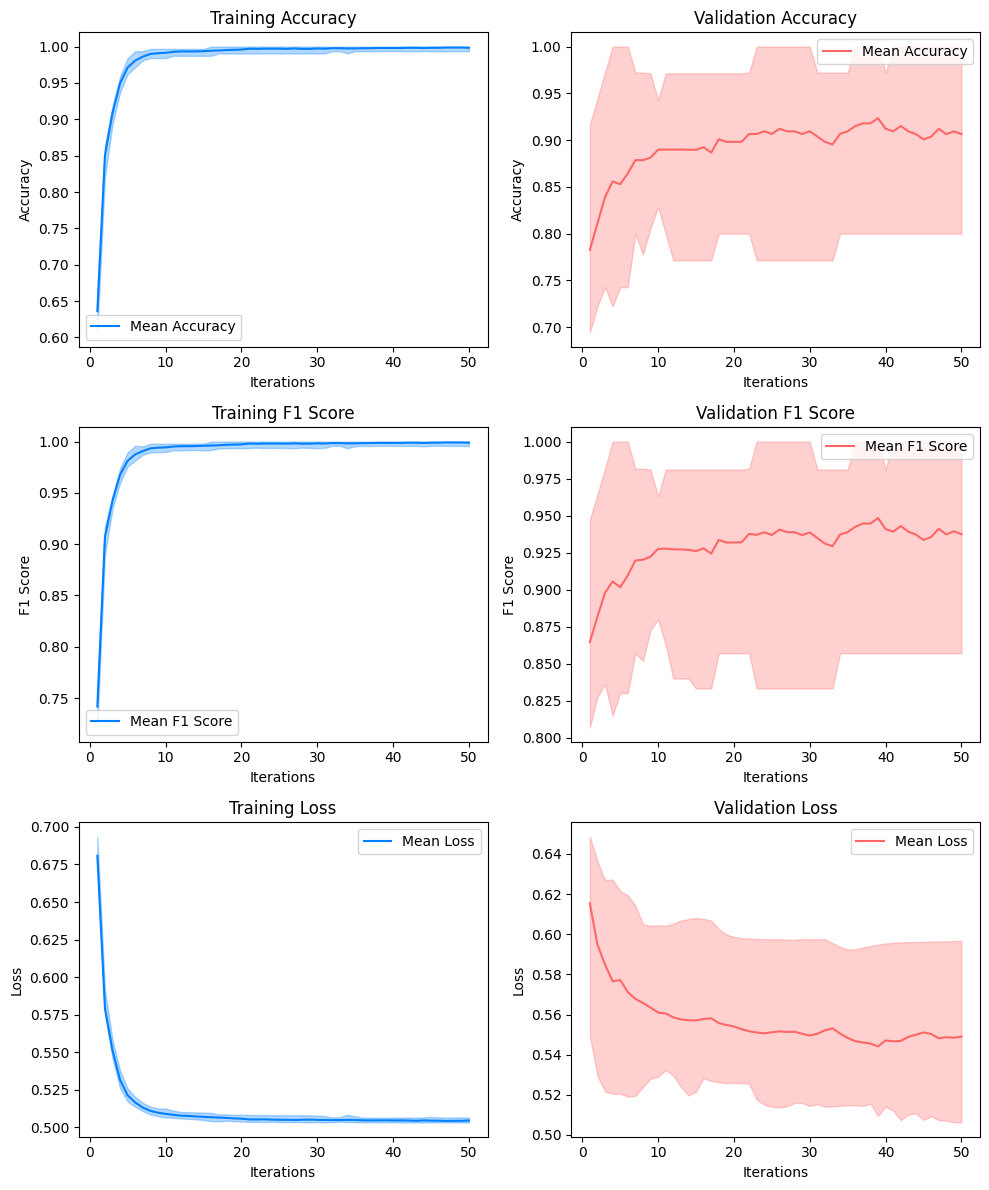

Processing Fold 1 ...


Epoch 25:  train/loss: 0.5114   valid/loss: 0.5546   train/acc: 0.9969   train/f1: 0.9978   valid/acc: 0.9167   valid/f1: 0.9492
Epoch 50:  train/loss: 0.5041   valid/loss: 0.5487   train/acc: 0.9969   train/f1: 0.9980   valid/acc: 0.9167   valid/f1: 0.9492

Training completed!


Processing Fold 2 ...


Epoch 25:  train/loss: 0.5114   valid/loss: 0.5222   train/acc: 0.9969   train/f1: 0.9979   valid/acc: 0.9722   valid/f1: 0.9818
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5221   train/acc: 0.9969   train/f1: 0.9980   valid/acc: 0.9722   valid/f1: 0.9818

Training completed!


Processing Fold 3 ...


Epoch 25:  train/loss: 0.5113   valid/loss: 0.5425   train/acc: 0.9969   train/f1: 0.9979   valid/acc: 0.9167   valid/f1: 0.9474
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5500   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.8889   valid/f1: 0.9310

Training completed!


Processing Fold 4 ...


Epoch 25:  train/loss: 0.5032   valid/loss: 0.5641   train/acc: 0.9969   train/f1: 0.9982   valid/acc: 0.8611   valid/f1: 0.9123
Epoch 50:  train/loss: 0.5033   valid/loss: 0.5719   train/acc: 0.9969   train/f1: 0.9981   valid/acc: 0.8611   valid/f1: 0.9153

Training completed!


Processing Fold 5 ...


Epoch 25:  train/loss: 0.5042   valid/loss: 0.5450   train/acc: 0.9969   train/f1: 0.9980   valid/acc: 0.9143   valid/f1: 0.9474
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5394   train/acc: 0.9969   train/f1: 0.9979   valid/acc: 0.9429   valid/f1: 0.9643

Training completed!


Processing Fold 6 ...


Epoch 25:  train/loss: 0.5113   valid/loss: 0.5160   train/acc: 0.9969   train/f1: 0.9978   valid/acc: 0.9714   valid/f1: 0.9825
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5163   train/acc: 0.9969   train/f1: 0.9981   valid/acc: 0.9714   valid/f1: 0.9825

Training completed!


Processing Fold 7 ...


Epoch 25:  train/loss: 0.5033   valid/loss: 0.5464   train/acc: 0.9969   train/f1: 0.9980   valid/acc: 0.9429   valid/f1: 0.9655
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5413   train/acc: 0.9969   train/f1: 0.9980   valid/acc: 0.9429   valid/f1: 0.9655

Training completed!


Processing Fold 8 ...


Epoch 25:  train/loss: 0.5034   valid/loss: 0.5422   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9429   valid/f1: 0.9615
Epoch 50:  train/loss: 0.5035   valid/loss: 0.5467   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9143   valid/f1: 0.9434

Training completed!


Processing Fold 9 ...


Epoch 25:  train/loss: 0.5112   valid/loss: 0.5456   train/acc: 0.9969   train/f1: 0.9979   valid/acc: 0.9143   valid/f1: 0.9455
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5507   train/acc: 0.9969   train/f1: 0.9981   valid/acc: 0.8857   valid/f1: 0.9286

Training completed!


Processing Fold 10 ...


Epoch 25:  train/loss: 0.5112   valid/loss: 0.5271   train/acc: 0.9969   train/f1: 0.9980   valid/acc: 0.9714   valid/f1: 0.9811
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5463   train/acc: 0.9969   train/f1: 0.9981   valid/acc: 0.9143   valid/f1: 0.9434

Training completed!


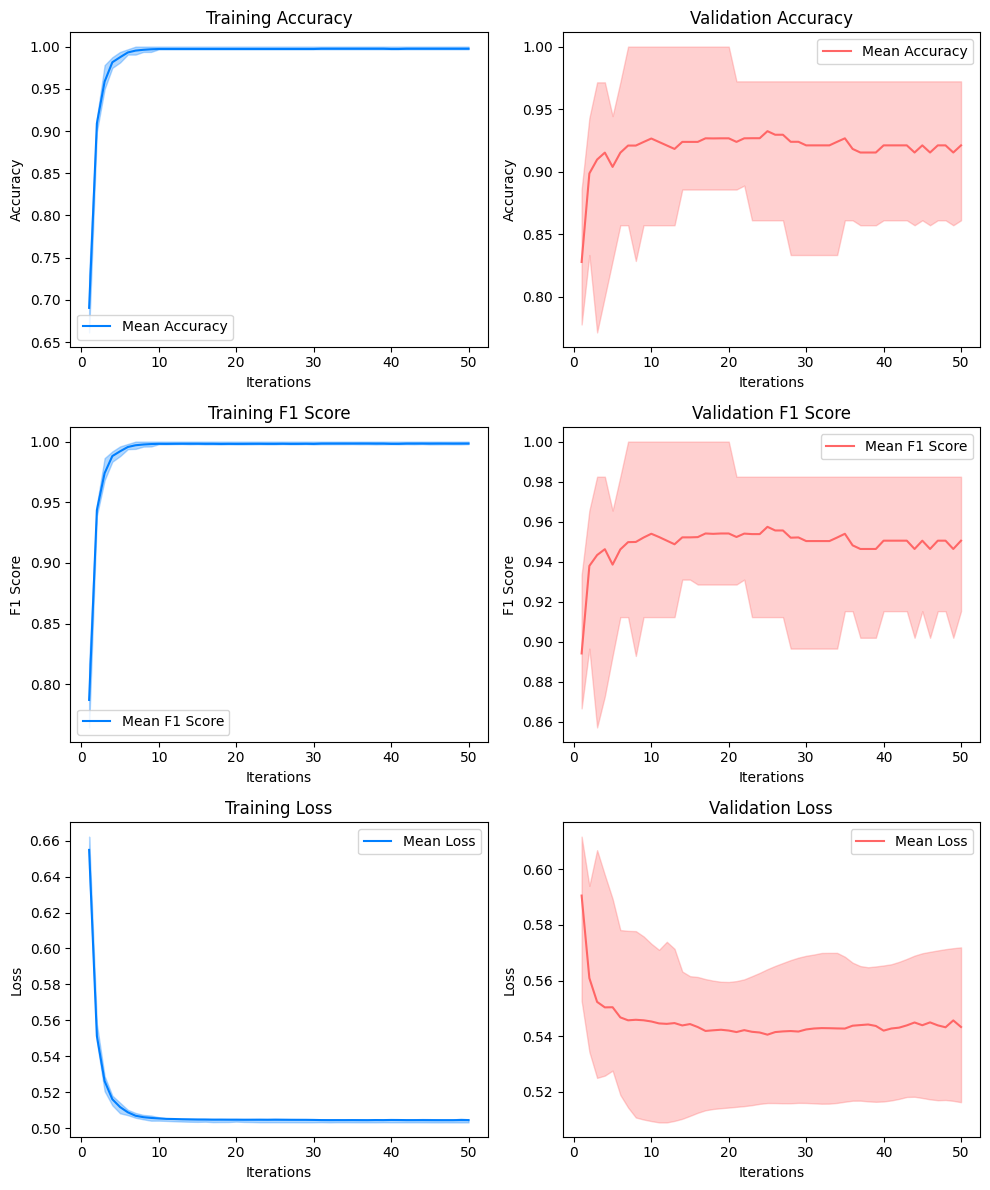

Processing Fold 1 ...


Epoch 25:  train/loss: 0.5038   valid/loss: 0.5402   train/acc: 0.9906   train/f1: 0.9942   valid/acc: 0.9722   valid/f1: 0.9831
Epoch 50:  train/loss: 0.5106   valid/loss: 0.5735   train/acc: 0.9969   train/f1: 0.9980   valid/acc: 0.8611   valid/f1: 0.9153

Training completed!


Processing Fold 2 ...


Epoch 25:  train/loss: 0.5033   valid/loss: 0.5875   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.8056   valid/f1: 0.8772
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5790   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.8611   valid/f1: 0.9153

Training completed!


Processing Fold 3 ...


Epoch 25:  train/loss: 0.5049   valid/loss: 0.5625   train/acc: 0.9969   train/f1: 0.9978   valid/acc: 0.8889   valid/f1: 0.9333
Epoch 50:  train/loss: 0.5035   valid/loss: 0.5676   train/acc: 0.9969   train/f1: 0.9982   valid/acc: 0.8889   valid/f1: 0.9333

Training completed!


Processing Fold 4 ...


Epoch 25:  train/loss: 0.5034   valid/loss: 0.5324   train/acc: 0.9969   train/f1: 0.9980   valid/acc: 0.9444   valid/f1: 0.9667
Epoch 50:  train/loss: 0.5058   valid/loss: 0.5431   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9444   valid/f1: 0.9667

Training completed!


Processing Fold 5 ...


Epoch 25:  train/loss: 0.5034   valid/loss: 0.5682   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.8571   valid/f1: 0.9123
Epoch 50:  train/loss: 0.5032   valid/loss: 0.5517   train/acc: 1.0000   train/f1: 1.0000   valid/acc: 0.9143   valid/f1: 0.9474

Training completed!


Processing Fold 6 ...


Epoch 25:  train/loss: 0.5035   valid/loss: 0.5677   train/acc: 0.9969   train/f1: 0.9979   valid/acc: 0.8571   valid/f1: 0.9091
Epoch 50:  train/loss: 0.5033   valid/loss: 0.5726   train/acc: 0.9969   train/f1: 0.9981   valid/acc: 0.8286   valid/f1: 0.8929

Training completed!


Processing Fold 7 ...


Epoch 25:  train/loss: 0.5033   valid/loss: 0.5126   train/acc: 0.9969   train/f1: 0.9978   valid/acc: 1.0000   valid/f1: 1.0000
Epoch 50:  train/loss: 0.5038   valid/loss: 0.5262   train/acc: 0.9969   train/f1: 0.9980   valid/acc: 0.9429   valid/f1: 0.9643

Training completed!


Processing Fold 8 ...


Epoch 25:  train/loss: 0.5064   valid/loss: 0.5858   train/acc: 0.9969   train/f1: 0.9983   valid/acc: 0.8286   valid/f1: 0.8929
Epoch 50:  train/loss: 0.5053   valid/loss: 0.6106   train/acc: 0.9937   train/f1: 0.9961   valid/acc: 0.8000   valid/f1: 0.8814

Training completed!


Processing Fold 9 ...


Epoch 25:  train/loss: 0.5038   valid/loss: 0.5537   train/acc: 0.9969   train/f1: 0.9981   valid/acc: 0.9143   valid/f1: 0.9492
Epoch 50:  train/loss: 0.5058   valid/loss: 0.5546   train/acc: 0.9969   train/f1: 0.9980   valid/acc: 0.8857   valid/f1: 0.9310

Training completed!


Processing Fold 10 ...


Epoch 25:  train/loss: 0.5034   valid/loss: 0.5565   train/acc: 0.9969   train/f1: 0.9981   valid/acc: 0.9143   valid/f1: 0.9492
Epoch 50:  train/loss: 0.5044   valid/loss: 0.5537   train/acc: 0.9969   train/f1: 0.9982   valid/acc: 0.9143   valid/f1: 0.9492

Training completed!


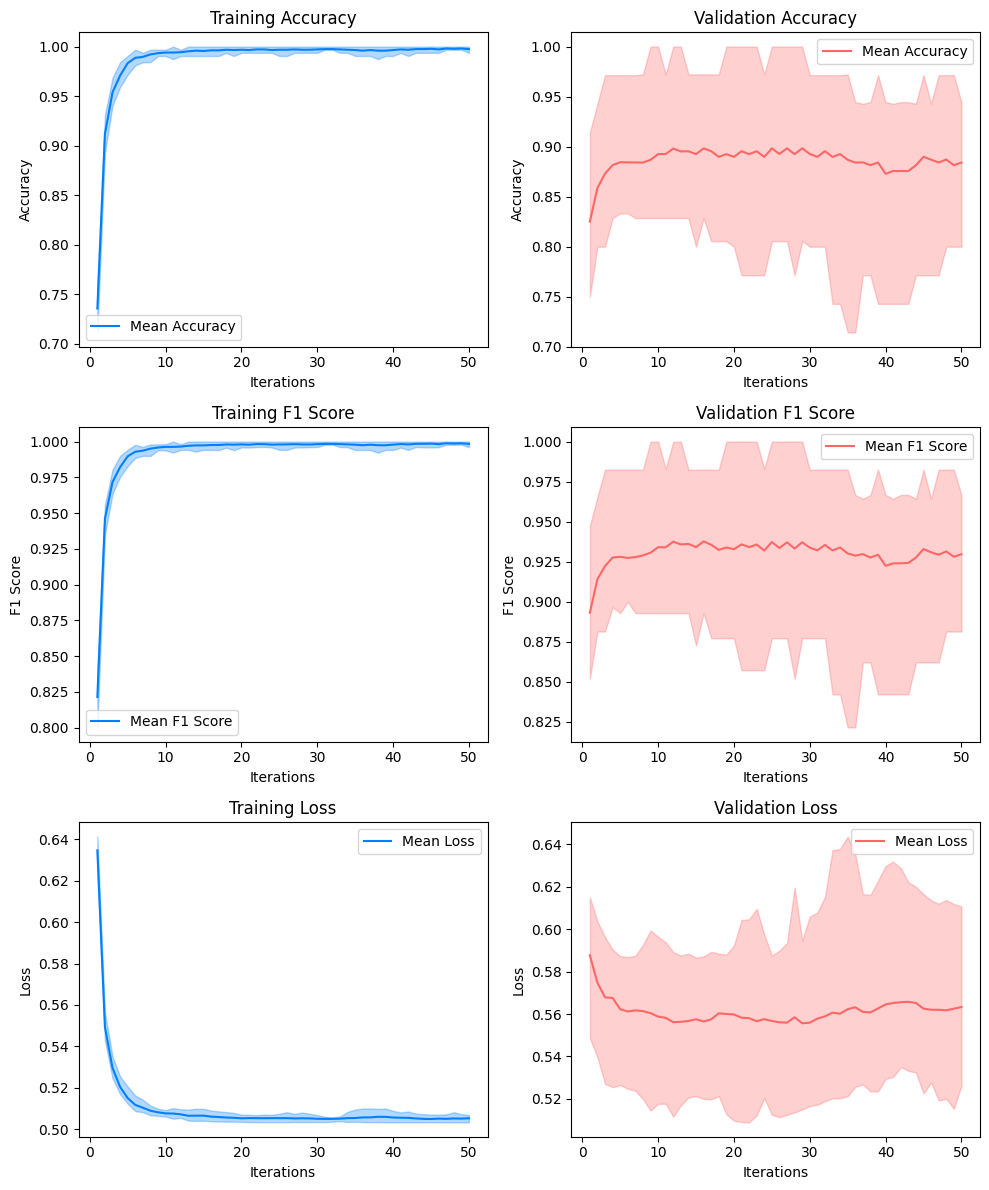

In [ ]:
cv = StratifiedKFold(n_splits=SPLIT, random_state=SEED, shuffle=True)
circuits_np = np.array(circuits, dtype=object)

for targets, label in [(se_targets, 'SE'), (us_targets, 'US'), (o_targets, 'O'), (pe_targets, 'PE')]:

    targets_np = np.array(targets, dtype=object)

    train_losses = []
    val_losses = []
    train_precisions = []
    val_precisions = []
    train_recalls = []
    val_recalls = []
    train_accuracies = []
    val_accuracies = []
    train_f1 = []
    val_f1 = []

    for i, (train_index, val_index) in enumerate(cv.split(circuits_np, targets_np.argmax(1))):

        print(f'Processing Fold {i+1} ...')

        train_fold = Dataset(circuits_np[train_index], targets_np[train_index], batch_size=BATCH_SIZE)
        val_fold = Dataset(circuits_np[val_index], targets_np[val_index])

        model = QuantumModel.from_diagrams(circuits)
        model.initialise_weights()

        trainer = PytorchTrainer(
            model=model,
            loss_function=torch.nn.BCEWithLogitsLoss(),
            optimizer=torch.optim.AdamW,
            learning_rate=LEARNING_RATE,
            epochs=EPOCHS,
            evaluate_functions=eval_metrics,
            evaluate_on_train=True,
            verbose='suppress',
            seed=SEED
        )

        trainer.fit(train_fold, val_fold, log_interval=25, early_stopping_interval=EARLY_STOPPING)

        train_losses.append(trainer.train_epoch_costs)
        val_losses.append(trainer.val_costs)

        train_precisions.append(trainer.train_eval_results['prec'])
        val_precisions.append(trainer.val_eval_results['prec'])

        train_recalls.append(trainer.train_eval_results['rec'])
        val_recalls.append(trainer.val_eval_results['rec'])

        train_accuracies.append(trainer.train_eval_results['acc'])
        val_accuracies.append(trainer.val_eval_results['acc'])

        train_f1.append(trainer.train_eval_results['f1'])
        val_f1.append(trainer.val_eval_results['f1'])

  range_ = np.arange(1, len(trainer.train_epoch_costs) + 1)

    mean_train_loss = np.mean(train_losses, axis=0)
    min_train_loss = np.min(train_losses, axis=0)
    max_train_loss = np.max(train_losses, axis=0)

    mean_val_loss = np.mean(val_losses, axis=0)
    min_val_loss = np.min(val_losses, axis=0)
    max_val_loss = np.max(val_losses, axis=0)


    mean_train_precision = np.mean(train_precisions, axis=0)
    min_train_precision = np.min(train_precisions, axis=0)
    max_train_precision = np.max(train_precisions, axis=0)

    mean_val_precision = np.mean(val_precisions, axis=0)
    min_val_precision = np.min(val_precisions, axis=0)
    max_val_precision = np.max(val_precisions, axis=0)


    mean_train_recall = np.mean(train_recalls, axis=0)
    min_train_recall = np.min(train_recalls, axis=0)
    max_train_recall = np.max(train_recalls, axis=0)

    mean_val_recalls = np.mean(val_recalls, axis=0)
    min_val_recalls = np.min(val_recalls, axis=0)
    max_val_recalls = np.max(val_recalls, axis=0)


    mean_train_accuracy = np.mean(train_accuracies, axis=0)
    min_train_accuracy = np.min(train_accuracies, axis=0)
    max_train_accuracy = np.max(train_accuracies, axis=0)

    mean_val_accuracy = np.mean(val_accuracies, axis=0)
    min_val_accuracy = np.min(val_accuracies, axis=0)
    max_val_accuracy = np.max(val_accuracies, axis=0)


    mean_train_f1 = np.mean(train_f1, axis=0)
    min_train_f1 = np.min(train_f1, axis=0)
    max_train_f1 = np.max(train_f1, axis=0)

    mean_val_f1 = np.mean(val_f1, axis=0)
    min_val_f1 = np.min(val_f1, axis=0)
    max_val_f1 = np.max(val_f1, axis=0)


    fig, axes = plt.subplots(5, 2, figsize=(12, 18))

    axes[0, 0].set_title('Training Accuracy')
    axes[0, 0].set_xlabel('Iterations')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].plot(range_, mean_train_accuracy, color=custom_primary, label='Mean Accuracy')
    axes[0, 0].fill_between(range_, min_train_accuracy, max_train_accuracy, color=custom_primary, alpha=0.3)
    axes[0, 0].legend()

    axes[0, 1].set_title('Validation Accuracy')
    axes[0, 1].set_xlabel('Iterations')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].plot(range_, mean_val_accuracy, color=custom_secondary, label='Mean Accuracy')
    axes[0, 1].fill_between(range_, min_val_accuracy, max_val_accuracy, color=custom_secondary, alpha=0.3)
    axes[0, 1].legend()

    axes[1, 0].set_title('Training F1 Score')
    axes[1, 0].set_xlabel('Iterations')
    axes[1, 0].set_ylabel('F1 Score')
    axes[1, 0].plot(range_, mean_train_f1, color=custom_primary, label='Mean F1 Score')
    axes[1, 0].fill_between(range_, min_train_f1, max_train_f1, color=custom_primary, alpha=0.3)
    axes[1, 0].legend()

    axes[1, 1].set_title('Validation F1 Score')
    axes[1, 1].set_xlabel('Iterations')
    axes[1, 1].set_ylabel('F1 Score')
    axes[1, 1].plot(range_, mean_val_f1, color=custom_secondary, label='Mean F1 Score')
    axes[1, 1].fill_between(range_, min_val_f1, max_val_f1, color=custom_secondary, alpha=0.3)
    axes[1, 1].legend()

    axes[2, 0].set_title('Training Precision')
    axes[2, 0].set_xlabel('Iterations')
    axes[2, 0].set_ylabel('Precision')
    axes[2, 0].plot(range_, mean_train_precision, color=custom_primary, label='Mean Precision')
    axes[2, 0].fill_between(range_, min_train_precision, max_train_precision, color=custom_primary, alpha=0.3)
    axes[2, 0].legend()

    axes[2, 1].set_title('Validation Precision')
    axes[2, 1].set_xlabel('Iterations')
    axes[2, 1].set_ylabel('Precision')
    axes[2, 1].plot(range_, mean_val_precision, color=custom_secondary, label='Mean Precision')
    axes[2, 1].fill_between(range_, min_val_precision, max_val_precision, color=custom_secondary, alpha=0.3)
    axes[2, 1].legend()

    axes[3, 0].set_title('Training Recall')
    axes[3, 0].set_xlabel('Iterations')
    axes[3, 0].set_ylabel('Recall')
    axes[3, 0].plot(range_, mean_train_recall, color=custom_primary, label='Mean Recall')
    axes[3, 0].fill_between(range_, min_train_recall, max_train_recall, color=custom_primary, alpha=0.3)
    axes[3, 0].legend()

    axes[3, 1].set_title('Validation Recall')
    axes[3, 1].set_xlabel('Iterations')
    axes[3, 1].set_ylabel('Recall')
    axes[3, 1].plot(range_, mean_val_recalls, color=custom_secondary, label='Mean Recall')
    axes[3, 1].fill_between(range_, min_val_recalls, max_val_recalls, color=custom_secondary, alpha=0.3)
    axes[3, 1].legend()

    axes[4, 0].set_title('Training Loss')
    axes[4, 0].set_xlabel('Iterations')
    axes[4, 0].set_ylabel('Loss')
    axes[4, 0].plot(range_, mean_train_loss, color=custom_primary, label='Mean Loss')
    axes[4, 0].fill_between(range_, min_train_loss, max_train_loss, color=custom_primary, alpha=0.3)
    axes[4, 0].legend()

    axes[4, 1].set_title('Validation Loss')
    axes[4, 1].set_xlabel('Iterations')
    axes[4, 1].set_ylabel('Loss')
    axes[4, 1].plot(range_, mean_val_loss, color=custom_secondary, label='Mean Loss')
    axes[4, 1].fill_between(range_, min_val_loss, max_val_loss, color=custom_secondary, alpha=0.3)
    axes[4, 1].legend()

    plt.figtext(0.99, -0.07, f'{label} requirements', horizontalalignment='right', fontsize=10, color='black')

    plt.tight_layout()
    plt.savefig(f"/content/drive/MyDrive/Tesi/Master-Thesis/figures/quantum/binary_{label}.pdf", format="pdf", bbox_inches="tight")
    plt.show()